In [1]:
!pip install geopandas

In [2]:
!pip install imageio

In [3]:
!pip install laspy

In [4]:
#!pip install rasterio

In [5]:
!pip install folium

In [6]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt
import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium
import geopandas as gpd
import io
from shapely.geometry import box
import pdal

In [7]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [8]:
import os
os.chdir("../data")
os.listdir()

['iowa.json', 'laz', 'tif']

In [9]:

# Read raster/tif file
# --------------------
iowa_tif = '../data/tif/iowa.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)

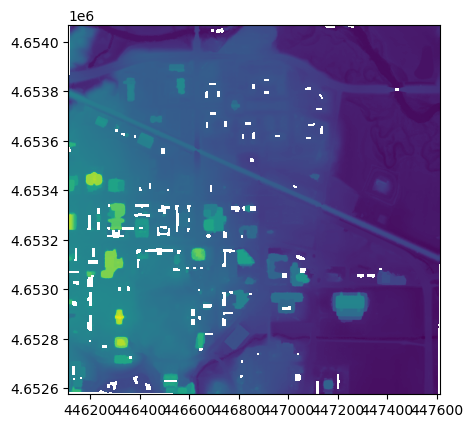

<AxesSubplot:>

In [10]:
from rasterio.plot import show
#plt won't work because tiff is an object not an array
raster_iowa = rasterio.open(iowa_tif)
show(raster_iowa)

In [11]:
full_image = raster_iowa.read()
full_image.shape

(1, 1493, 1499)

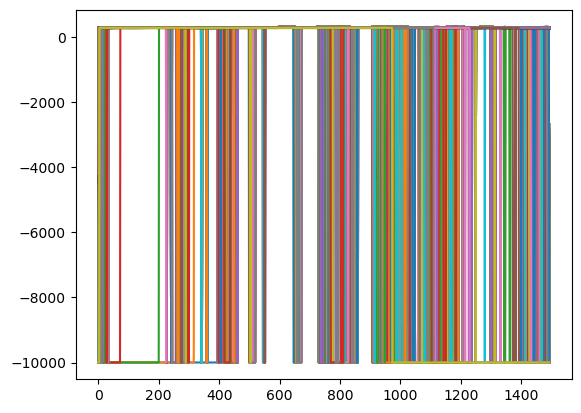

In [12]:

img_band =  raster_iowa.read(1)
plt.plot(img_band)
plt.show()

In [13]:
#find out CRS
print("Co-ordinate Reference System:", raster_iowa.crs)

Co-ordinate Reference System: EPSG:26915


In [67]:
#raster_iowa.to_crs(epsg=4326).plot()

In [14]:
type(iowa_data)

numpy.ndarray

In [15]:
count = iowa_data[iowa_data > 0].sum()
count

623568522.8765813

In [16]:
metadata = raster_iowa.meta
print("Metadata: {metadata}\n".format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 1499, 'height': 1493, 'count': 1, 'crs': CRS.from_epsg(26915), 'transform': Affine(1.0, 0.0, 446112.3908587211,
       0.0, -1.0, 4654068.192733061)}



In [17]:
desc = raster_iowa.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('idw',)



In [18]:
#geo-transform
print("Geotransform:",raster_iowa.transform)

Geotransform: | 1.00, 0.00, 446112.39|
| 0.00,-1.00, 4654068.19|
| 0.00, 0.00, 1.00|


In [19]:

# get shp from tif
from glob import glob
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    return df
    print('Saved..')

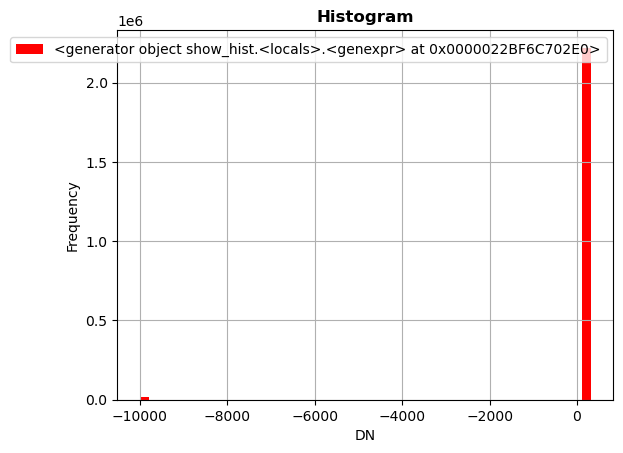

In [20]:
rasterio.plot.show_hist(full_image,bins=50,histtype='stepfilled',lw=0.0,stacked=False)

In [21]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(iowa_data, title)

In [22]:
import geopandas as gpd
from shapely.geometry import Polygon

MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


In [23]:
shp_df = get_shp_from_tif("../data/tif/iowa.tif", "../data/shp")

In [24]:
shp_df

,id,geometry
0,1,"POLYGON ((447611.391 4652575.193, 447611.391 4..."


In [106]:
shp_df = gpd.read_file('../data/shp/shp.shp')
shp_df.plot()

<AxesSubplot:>

In [75]:
#shp_df.to_crs(epsg=4326).plot()

In [25]:
!pip install georaster

In [26]:
import georaster
print(georaster.__file__)

C:\Users\DELL\anaconda3\envs\iowa\lib\site-packages\georaster\__init__.py


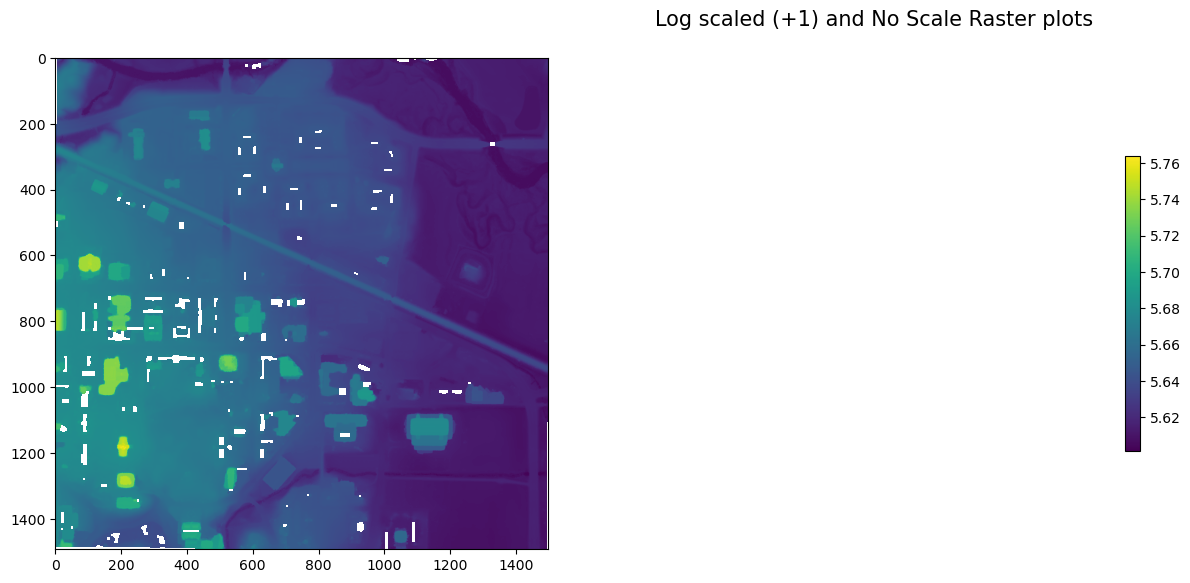

In [27]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('../data/tif/iowa.tif', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.show(block=False)

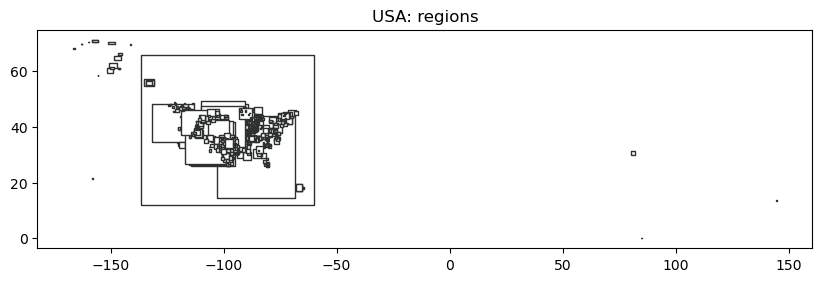

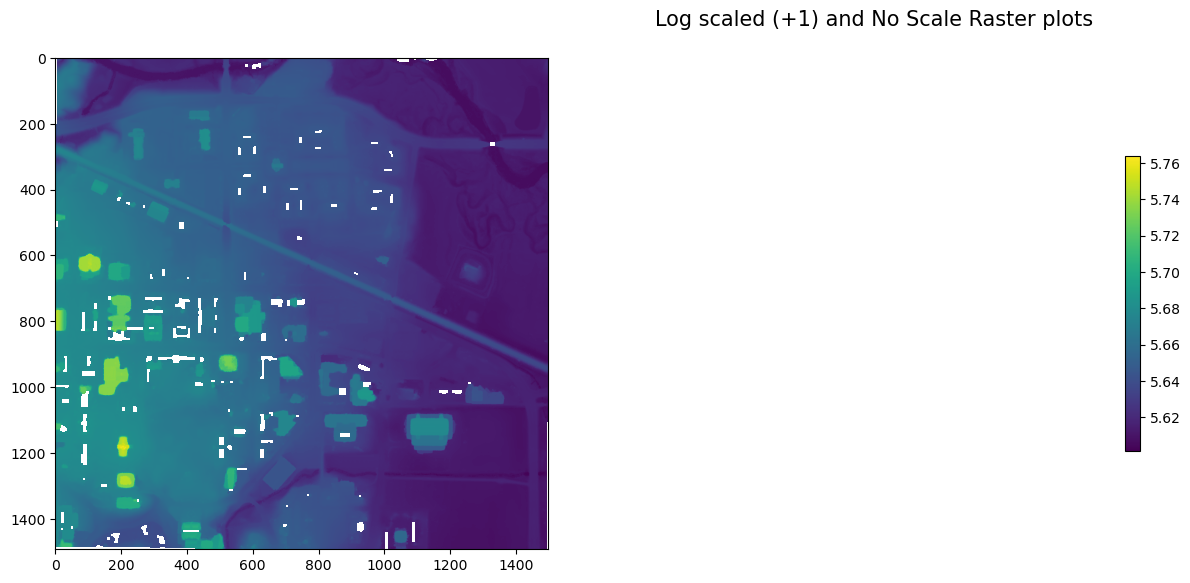

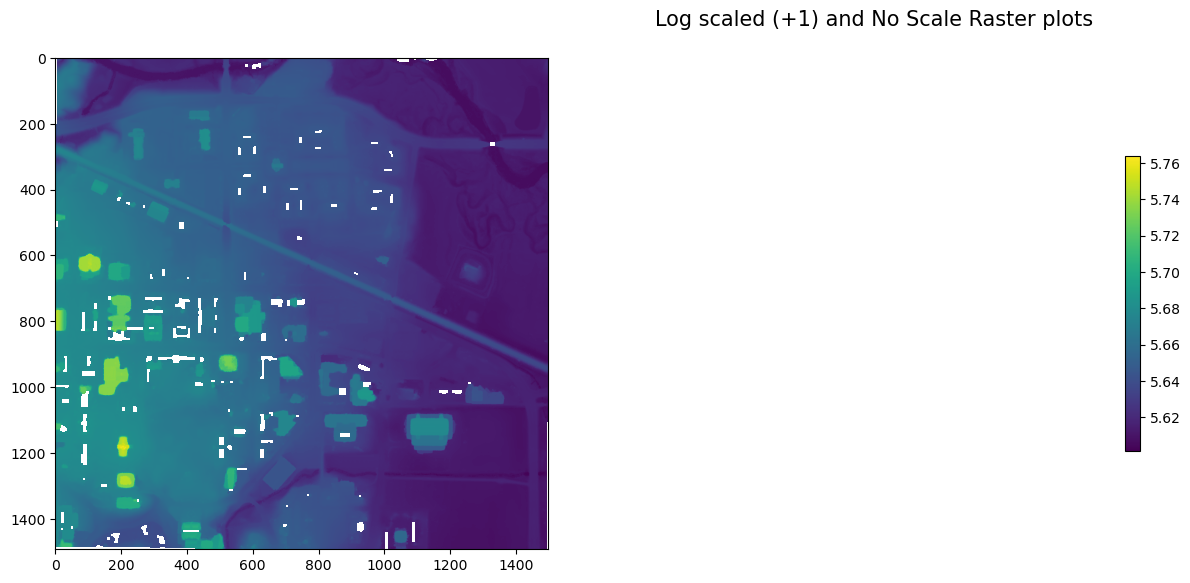

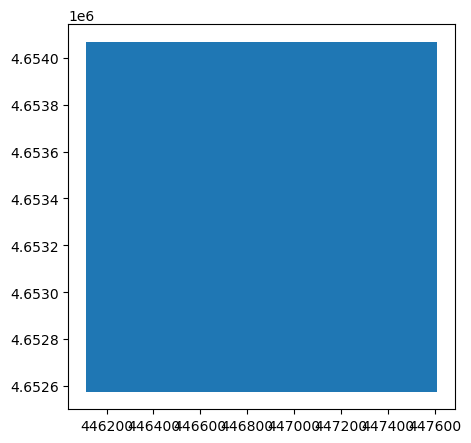

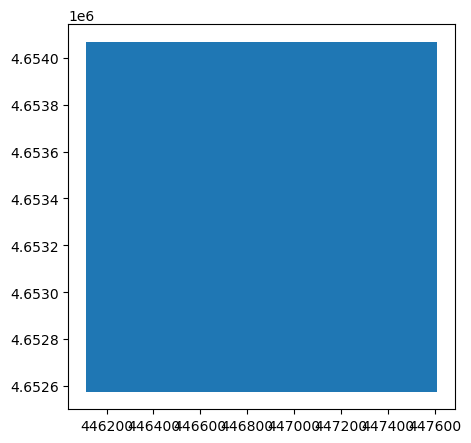

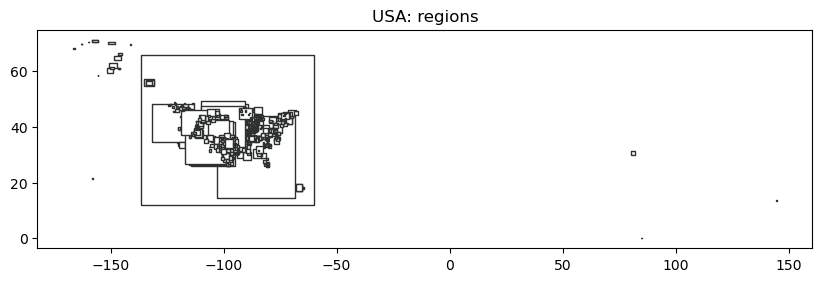

<Figure size 1200x800 with 0 Axes>

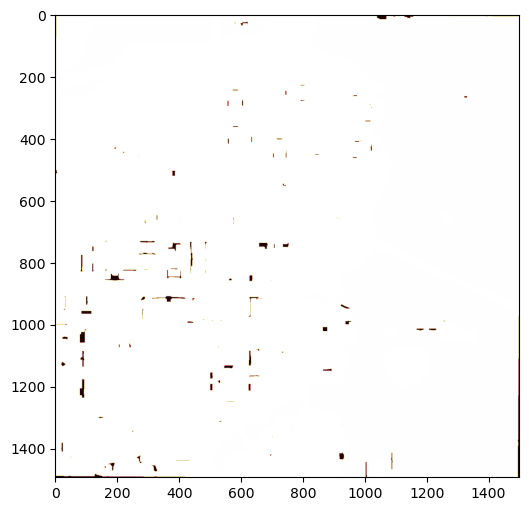

In [92]:
src = rasterio.open("../data/.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

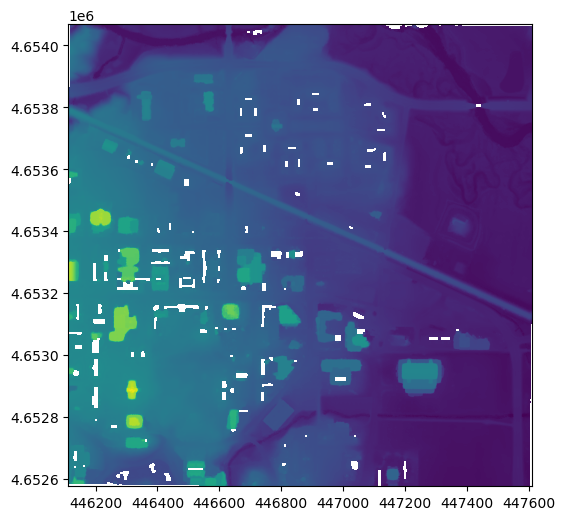

<AxesSubplot:>

In [93]:
from rasterio.plot import show
plt.figure(figsize=(10, 6))
show(src)

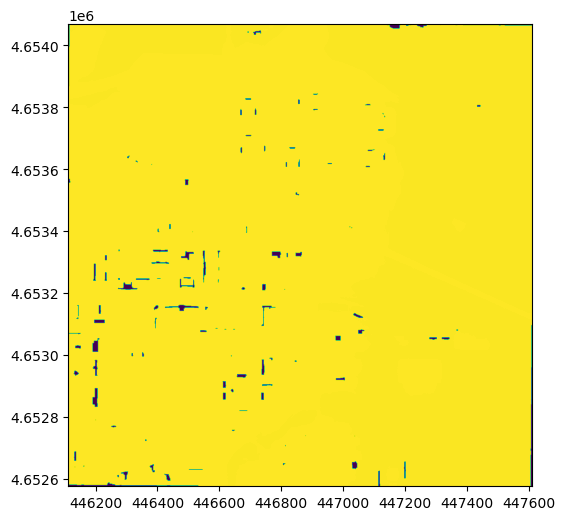

<AxesSubplot:>

In [94]:
plt.figure(figsize=(10, 6))
show((src, 1), transform=src.transform, cmap='viridis')

In [95]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), ax=ax, contour=True, contour_label_kws={})

<AxesSubplot:>

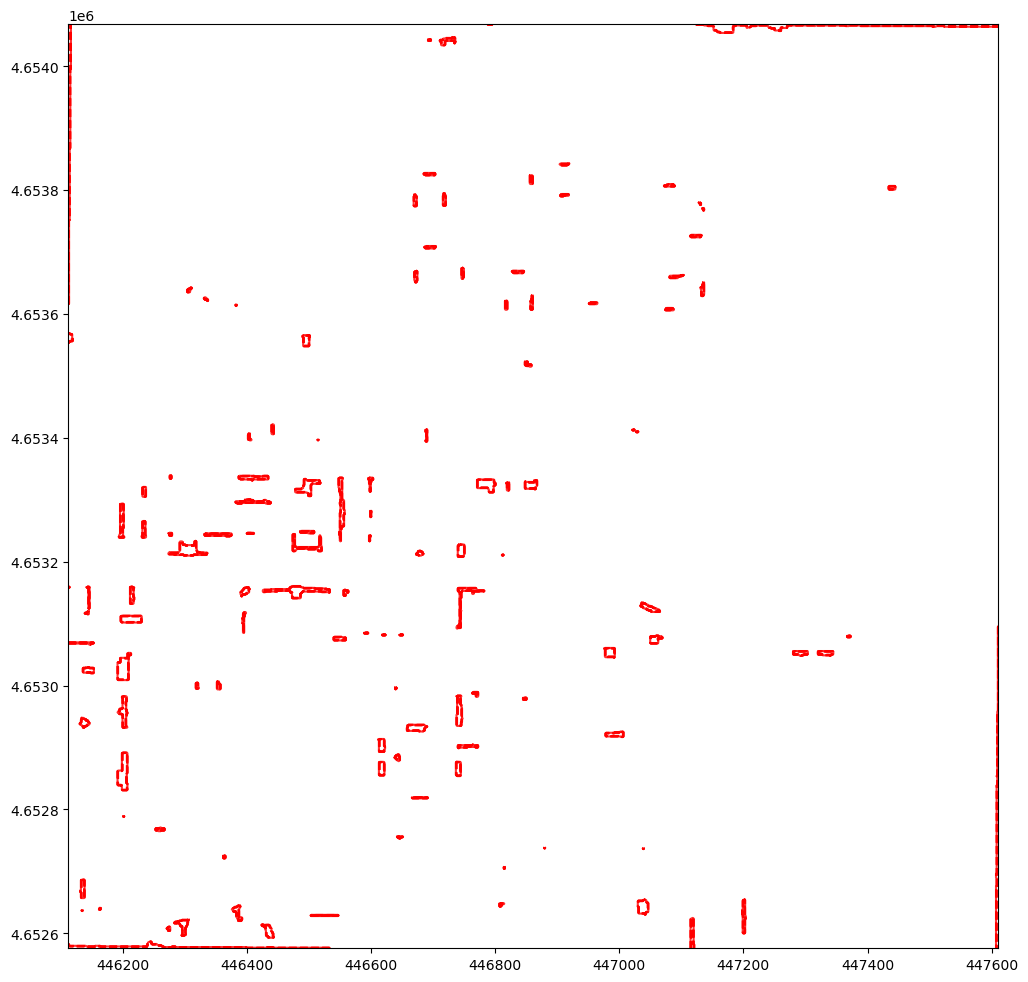

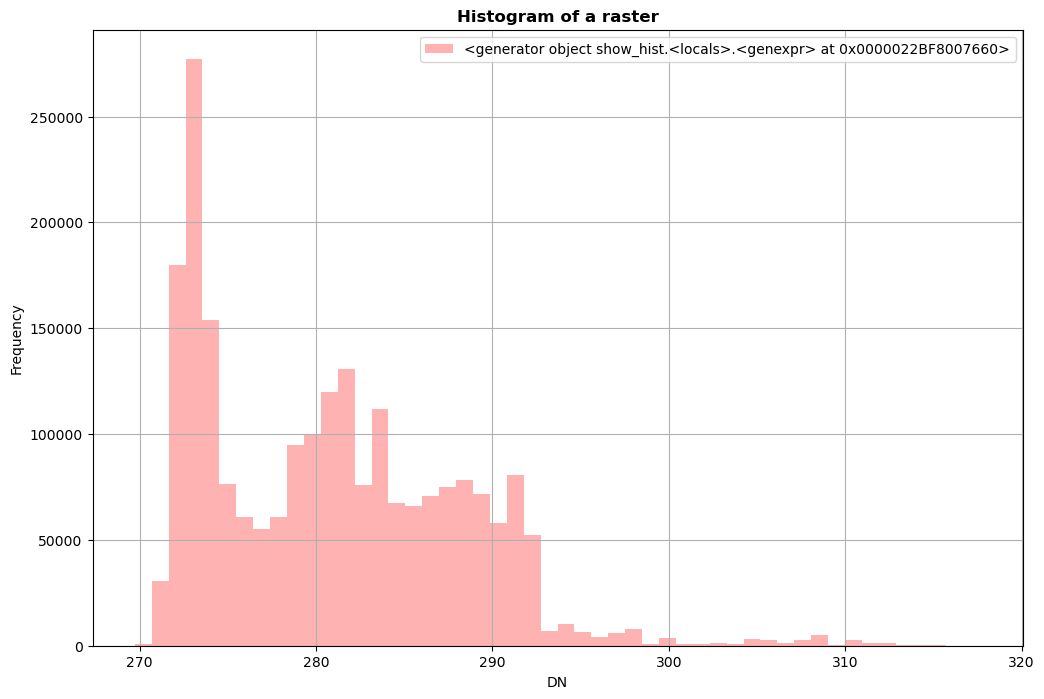

In [96]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")

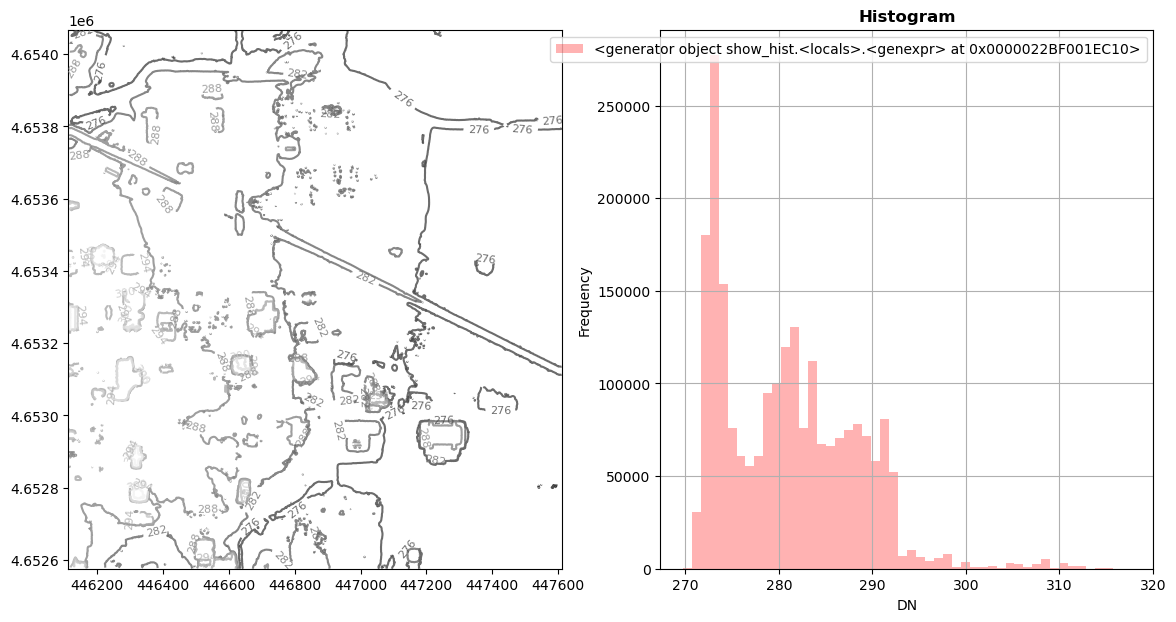

In [97]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()


In [100]:
## Plot raster/tif image
# --------------------
import numpy as np
def plot_raster(rast_data, title='', figsize=(10,10)):
    """
    Plots population count in log scale(+1)
    """
    plt.figure(figsize = figsize)
    im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)

    plt.title("{}".format(title), fontdict = {'fontsize': 20})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [101]:
def select_name(name:str):
    name_ls = []
    names_list =  io.open('../data/filename.txt', encoding='UTF-8').read().strip().split('\n')
    if name in names_list:
        return name
    if name == 'all':
        return names_list
    else:
        for words in names_list:
            words_ls = words.split('_')
            if name in words_ls:
                name_ls.append(words)
            else: continue
        if name_ls == []:
            print(f"Name - ({name}) not found, input a valid name")
            return None
        else: return name_ls

In [102]:
y = select_name('all')